# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


632

In [29]:

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Get the temperature from the response

#set up lists to hold reponse info
cit = []
lat = []
long = []
date = []
max_temp = []
temp = []
cloud = []
hum = []
ws = []
Cont = []
# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
#         print(json.dumps(response, indent=4, sort_keys=True))
        cit.append(response['name'])
        long.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        date.append(response['dt'])
        max_temp.append(response['main']['temp_max'])
        temp.append(response['main']['temp'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        ws.append(response['wind']['speed'])
        Cont.append(response['sys']['country'])
        
    except KeyError:
        print("City is not found")

    
    
# #     cloud.append(response)
# for city in cities:
#   response = requests.get(query_url + city).json()
#   print(query_url+city)
 
# #     break
print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")
print(f"The cloud information received is: {cloud}")
print(f"The humidity information received is: {hum}")
print(f"The windspeed information received is: {ws}")
print(f"The city information received is: {cit}")
print(f"The long information received is: {long}")
print(f"The date information received is: {date}")
print(f"The max_temp information received is: {max_temp}")


City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is no

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
weather_data_df = pd.DataFrame({"City": cit,
                                "Country": Cont,
                                "Longitude": long,
                                "Latitude": lat,
                                "Date": date,
                                "Temp (C)": temp,        
                                "Humidity": hum,
                                "Cloudiness(%)": cloud,
                                "Wind Speed": ws,
                                "Humidity%": hum,
                                "Max_Temp(C)": max_temp})

weather_data_df

,City,Country,Longitude,Latitude,Date,Temp (C),Humidity,Cloudiness(%),Wind Speed,Humidity%,Max_Temp(C)
0,Saint-Philippe,CA,-73.48,45.36,1553803221,6.42,45,90,4.60,45,8.00
1,Hermanus,ZA,19.24,-34.42,1553802378,18.89,92,64,1.34,92,18.89
2,Komatipoort,MZ,31.96,-25.43,1553803243,21.29,94,0,1.00,94,21.67
3,Coquimbo,CL,-71.34,-29.95,1553799600,17.00,72,75,4.60,72,17.00
4,Yellowknife,CA,-114.38,62.45,1553802907,-0.19,96,75,8.20,96,0.00
5,Petukhovo,RU,67.89,55.06,1553803537,1.27,93,92,8.73,93,1.27
6,Albany,US,-73.75,42.65,1553802840,10.60,39,1,3.10,39,12.78
7,Vaini,IN,74.49,15.34,1553802848,19.47,92,0,0.88,92,19.47
8,Meulaboh,ID,96.13,4.14,1553802892,26.52,100,36,1.21,100,26.52
9,Barrow,AR,-60.23,-38.31,1553803121,24.02,41,48,7.66,41,24.02


In [31]:
# weather_data_df.to_csv('weather_data_csv.csv')
weather_data_df.count()

                                             


City             563
Country          563
Longitude        563
Latitude         563
Date             563
Temp (C)         563
Humidity         563
Cloudiness(%)    563
Wind Speed       563
Humidity%        563
Max_Temp(C)      563
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

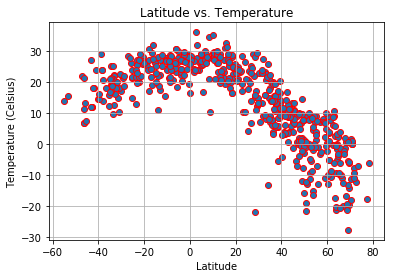

In [32]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Temp (C)"], marker="o",facecolor=None, edgecolor='r')

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature(3_26_2019)")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_Temp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

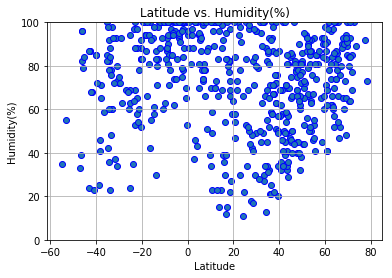

In [33]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Humidity"], marker="o",facecolor=None, edgecolor='b')

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity(%) (3_26_2019)")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(0, 100)
# Save the figure
plt.savefig("Lat_vs_Hum.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

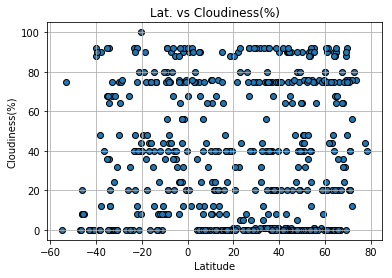

In [34]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Cloudiness(%)"], marker="o",facecolor=None, edgecolor='black')

# Incorporate the other graph properties
plt.title("Lat. vs Cloudiness(%)(3_26_2019)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

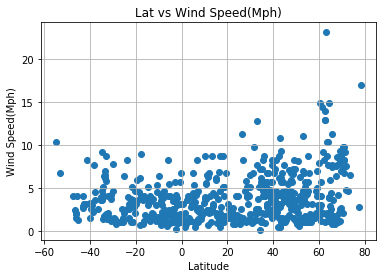

In [36]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Lat vs Wind Speed(Mph)(3_26_2019)")
plt.ylabel("Wind Speed(Mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_windspeed.png")

# Show plot
plt.show()